#**importing lybraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



#**reading data**

In [2]:
data=pd.read_csv("Wine.csv")

# **checking data shape**

In [3]:
row,col=data.shape

print(f' There are {row}rows and {col}columns')


 There are 178rows and 13columns


In [4]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#**Checking if there any missing values**

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

we found no missing values

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


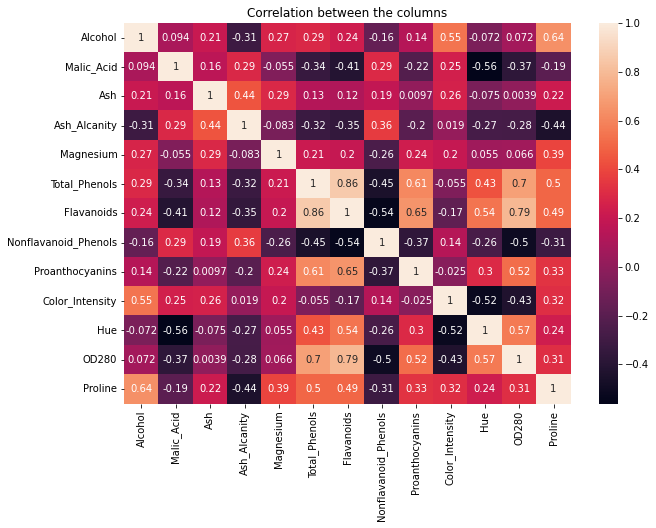

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation between the columns")
plt.show()

#**KMeans Clustering**

##**finding the optimal clusters**

1.Using Elbow Method

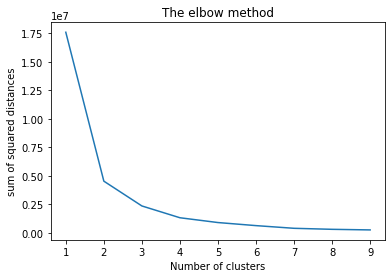

In [15]:
wss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,)
  kmeans.fit(data)
  wss.append(kmeans.inertia_)

plt.plot(range(1,10),wss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("sum of squared distances")
plt.show()

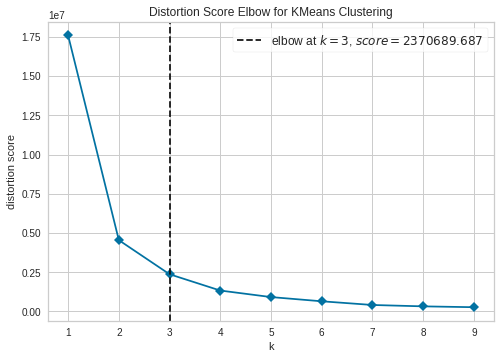

In [17]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(data)
visualizer.show()

2.Check with the Silhouette Score

In [20]:
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,max_iter=100)
  kmeans.fit(data)
  sil_score=silhouette_score(data,kmeans.labels_)
  print("for cluster: {},the silhouette score is: {}".format(i,sil_score))

for cluster: 2,the silhouette score is: 0.6568536504294317
for cluster: 3,the silhouette score is: 0.571138193786884
for cluster: 4,the silhouette score is: 0.5620323449580346
for cluster: 5,the silhouette score is: 0.5489993239795681
for cluster: 6,the silhouette score is: 0.5656413100386375
for cluster: 7,the silhouette score is: 0.5616196384056887
for cluster: 8,the silhouette score is: 0.5398971441034123
for cluster: 9,the silhouette score is: 0.5287268772337207


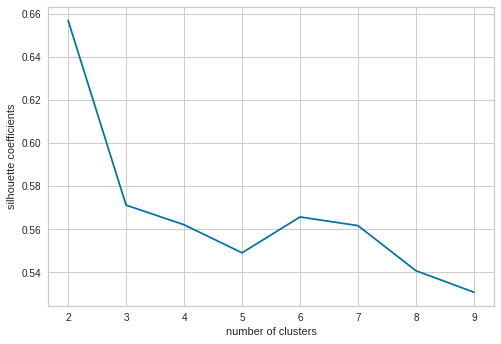

In [21]:
sil_coeff=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,max_iter=100)
  kmeans.fit(data)
  sil_score=silhouette_score(data,kmeans.labels_)
  sil_coeff.append(sil_score)

plt.plot(range(2,10),sil_coeff)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficients")
plt.show()


We found that the optimal k value is 3

##**KMeans Clustering with PCA**

In [41]:
pca_df1=data.copy()#copy the dataset to new dataset

In [42]:
PCa=PCA()
x=PCa.fit_transform(pca_df1)

In [44]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(x)
unique_label=np.unique(label)

clusters

In [45]:
unique_label

array([0, 1, 2], dtype=int32)

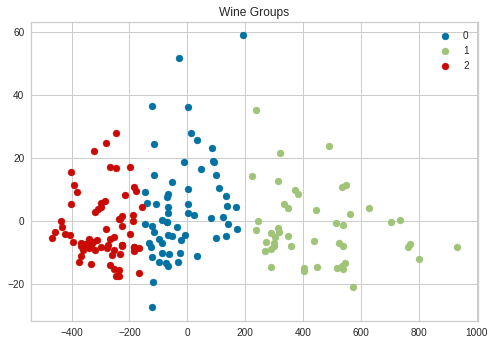

In [51]:
for i in unique_label:
  plt.scatter(x[label==i,0],x[label==i,1],label=i)

plt.legend()
plt.title("Wine Groups")
plt.show()

finding the cluster centers

In [61]:
centers=kmeans.cluster_centers_

centers

array([[-1.84841928e+01,  4.20263004e+00, -4.33492883e-01,
        -5.85058485e-01, -2.44881958e-01, -2.15787432e-01,
         9.54770838e-02, -2.00206250e-02,  6.18111936e-02,
         5.45775424e-02,  3.98345852e-02, -1.04003855e-02,
        -1.02163324e-03],
       [ 4.48296775e+02, -2.25699960e+00,  4.67069639e-01,
         3.24455839e-01,  2.01009861e-01,  1.36761204e-01,
        -9.66642692e-02,  1.86768968e-02, -1.88769418e-02,
        -2.39602624e-02, -1.76193406e-02,  4.86681496e-04,
        -1.46363857e-03],
       [-2.88752586e+02, -2.23889973e+00,  7.13664596e-02,
         3.04698575e-01,  8.31191004e-02,  1.00739771e-01,
        -1.99472253e-02,  5.26760294e-03, -4.26822860e-02,
        -3.27199319e-02, -2.37918156e-02,  9.01376623e-03,
         1.91496048e-03]])

Visualising with cluster center

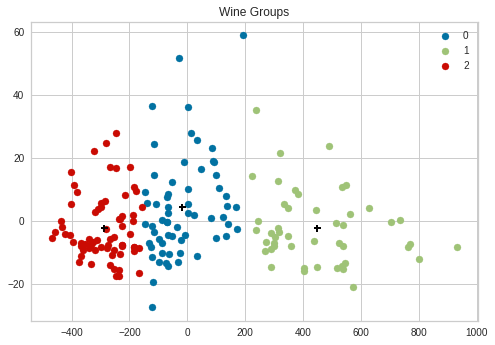

In [66]:
for i in unique_label:
  plt.scatter(x[label==i,0],x[label==i,1],label=i)
  plt.scatter(centers[:,0],centers[:,1],color='black',marker='+')

plt.legend()
plt.title("Wine Groups")
plt.show()

In [48]:
pca_df1['KMean_Quality']=label
pca_df1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


#**Hierarchical Clustering**

With Ward method

In [71]:
hc_data=data.copy()

In [67]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

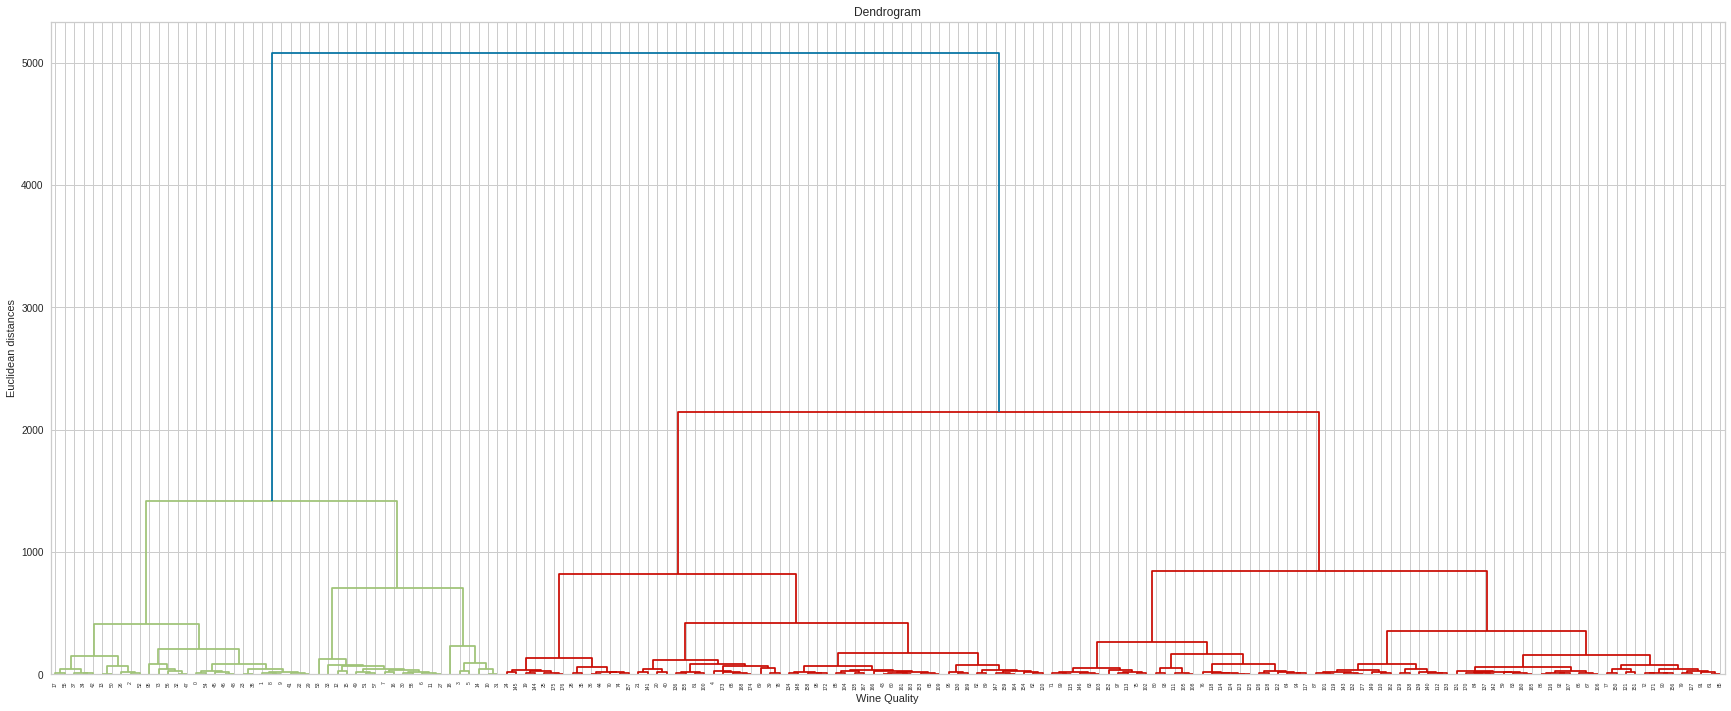

In [72]:
plt.figure(figsize=(30,12))
dendrogram = sch.dendrogram(sch.linkage(hc_data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Wine Quality')
plt.ylabel('Euclidean distances')
plt.show()

Here we can see 3 clusters

In [83]:
HPCa=PCA()
y=HPCa.fit_transform(hc_data)

In [73]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [91]:
yy =AC.fit_predict(y)
uq_lb=np.unique(yy)
uq_lb


array([0, 1, 2])

In [101]:
# Fetch the cluster labels
pca_df1['HC_Clusters']= yy
pca_df1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_Quality,HC_Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,2
